In [42]:
import pandas  as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve,
    auc, precision_recall_curve, 
    average_precision_score,
    classification_report
)



In [46]:
df = pd.read_csv('healthcare_readmission_200.csv')

X = df.drop(['Readmitted'], axis=1)
y = df['Readmitted']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.26, random_state=42)   

gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbc.fit(Xtrain, ytrain)

y_pred = gbc.predict(Xtest)

accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy:.4f}")



Accuracy of Gradient Boosting Classifier: 0.7885


<Figure size 550x500 with 0 Axes>

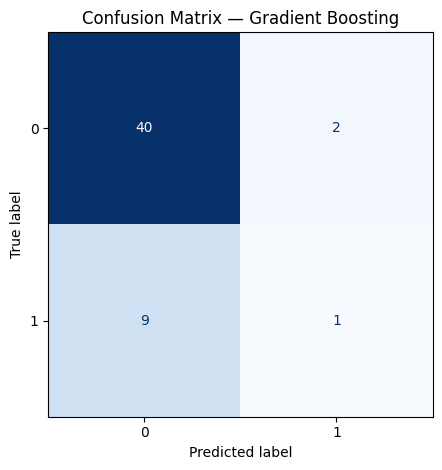


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        42
           1       0.33      0.10      0.15        10

    accuracy                           0.79        52
   macro avg       0.57      0.53      0.52        52
weighted avg       0.72      0.79      0.74        52



In [43]:

# Confusion Matrix
cm = confusion_matrix(ytest, y_pred, labels=np.unique(ytrain))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(ytrain))

plt.figure(figsize=(5.5, 5))
disp.plot(cmap="Blues", values_format="d", colorbar=False)
plt.title("Confusion Matrix — Gradient Boosting")
plt.tight_layout()
plt.show()

# Classification report (text)
print("\nClassification Report:\n")
print(classification_report(ytest, y_pred))
